# COVID19 evolution analysis

#### data loading

In [491]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tools
import plotly.express as px

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [492]:
df_naz = pd.read_csv('../../external_data/ProtezioneCivile/COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv').drop('stato',1)
reg = pd.read_csv('../../external_data/ProtezioneCivile/COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv')
prov = pd.read_csv('../../external_data/ProtezioneCivile/COVID-19/dati-province/dpc-covid19-ita-province.csv').drop('stato',1)
df_naz.index = pd.to_datetime(df_naz.index)
reg['data'] = pd.to_datetime(reg['data'])
prov['data'] = pd.to_datetime(prov['data'])
df_world_confirmed = pd.read_csv('../../external_data/JohnHopkins/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_world_deaths = pd.read_csv('../../external_data/JohnHopkins/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_world_recovered = pd.read_csv('../../external_data/JohnHopkins/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
populations = pd.read_csv('../../external_data/population_data/API_SP.POP.TOTL_DS2_en_csv_v2_866861.csv', skiprows=4, engine='python').set_index('Country Name')['2018']
df_world_confirmed['pop'] = df_world_confirmed['Country/Region'].map(populations)
df_world_deaths['pop'] = df_world_deaths['Country/Region'].map(populations)
df_world_recovered['pop'] = df_world_recovered['Country/Region'].map(populations)
df_naz = tools.add_extra_features(df_naz)
regions = reg.groupby('denominazione_regione')
df_reg = {}
for item in regions.groups:
    df_reg[item] = tools.add_extra_features(regions.get_group(item)).replace((np.inf, np.nan), 0)
provinces = prov.groupby('sigla_provincia')
df_prov = pd.DataFrame()
for item in provinces.groups:
    df_prov = pd.concat((df_prov,tools.add_extra_features(provinces.get_group(item)).replace((np.inf, np.nan), 0)),0)

In [493]:
date_cols = [item for item in df_world_confirmed.columns if '/20' in item]

In [494]:
df_world_confirmed.pivot_table(index='Country/Region', values=date_cols)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/17/20,3/18/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.0,74.0,3.0,5.0,12.0,12.0,17.0,17.0,19.0,20.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.0,39.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Uzbekistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Italy

### diffusion heatmap for provinces

In [495]:
col = 'totale_casi'
fig = px.density_mapbox(df_prov[df_prov.index==df_prov.index.max()], 
                        lat='lat', lon='long', z=col, radius=10, 
                        hover_name='denominazione_provincia',
                        zoom=5,  height=800,
                        #animation_frame=df_prov[df_prov.index==df_prov.index.max()].index,
                        mapbox_style="stamen-terrain",
                        title = col + ' on ' + str(df_prov.index.max()))
fig.show()

In [496]:
col = '%delta_totale_casi'
fig = px.density_mapbox(df_prov[df_prov.index==df_prov.index.max()], 
                        lat='lat', lon='long', z=col, radius=10, 
                        hover_name='denominazione_provincia',
                        zoom=5,  height=800,
                        #animation_frame=df_prov.index,
                        mapbox_style="stamen-terrain",
                        title = col + ' on ' + str(df_prov.index.max()))
fig.show()

### National evolution

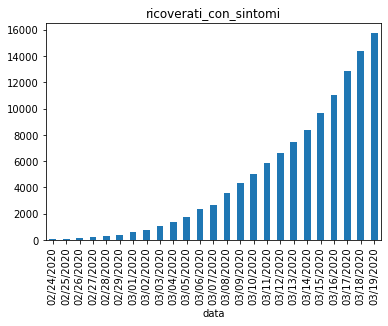

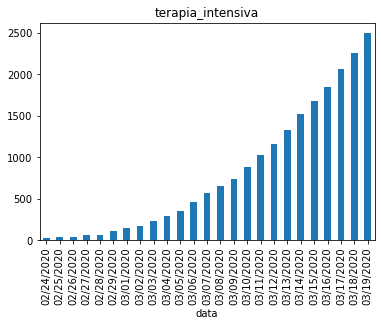

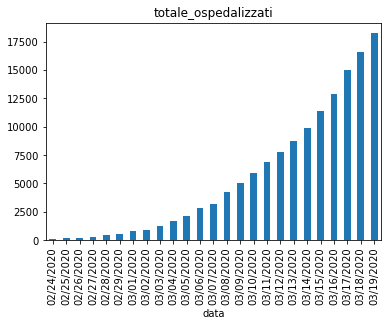

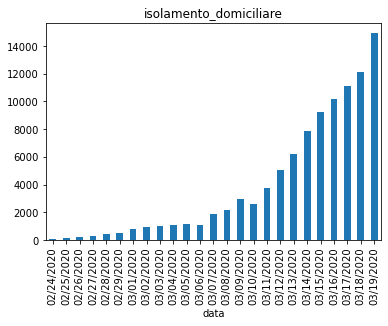

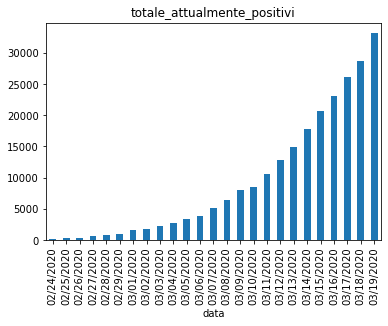

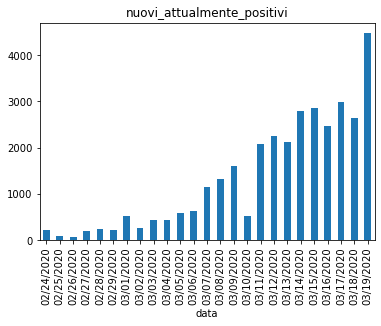

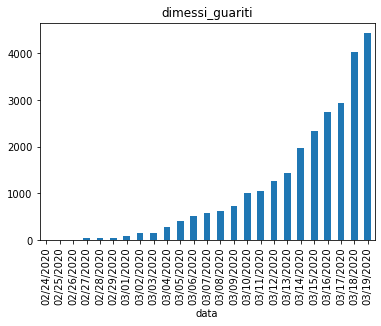

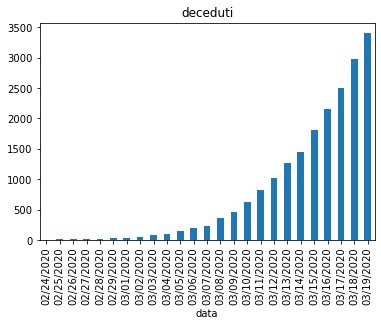

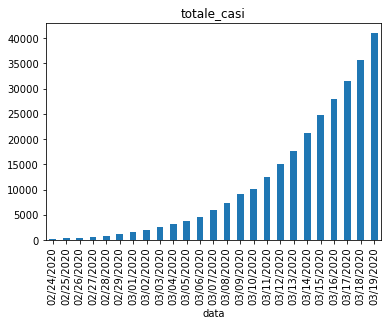

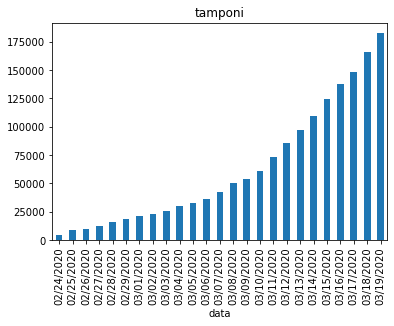

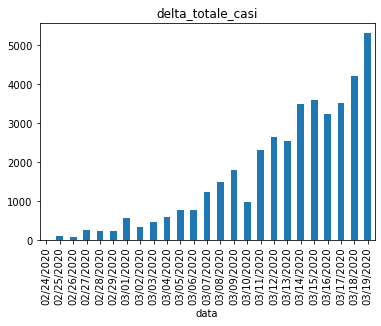

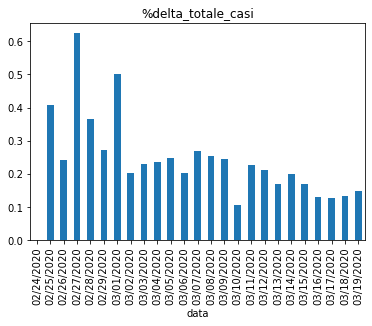

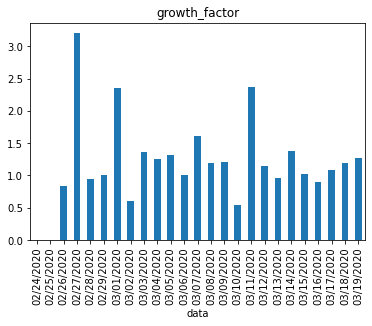

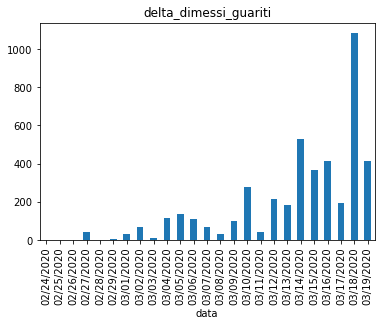

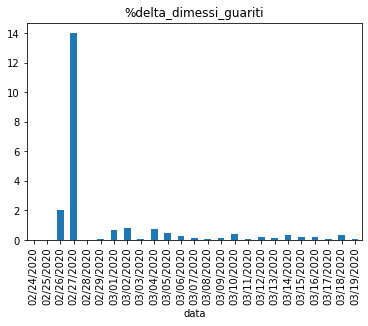

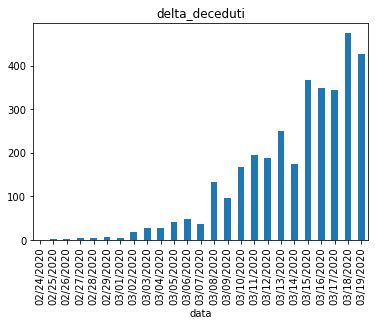

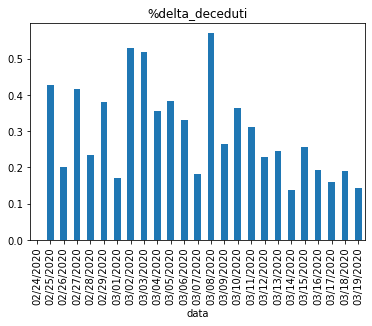

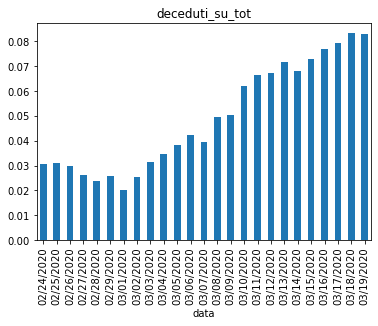

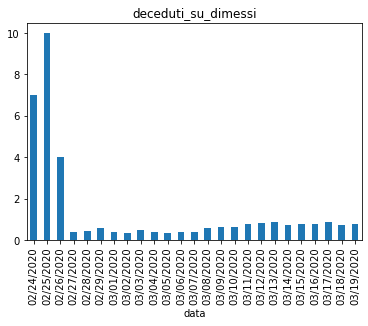

In [497]:
for col in df_naz.columns:
    plt.figure()
    df_naz[col].plot(kind='bar', title=col)    

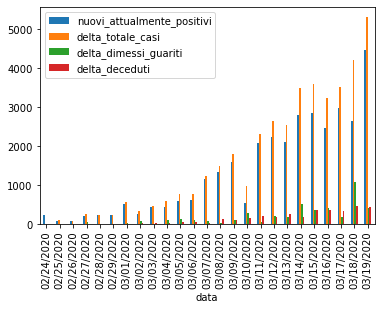

In [498]:
df_naz[['nuovi_attualmente_positivi', 'delta_totale_casi','delta_dimessi_guariti','delta_deceduti']].plot(kind='bar')

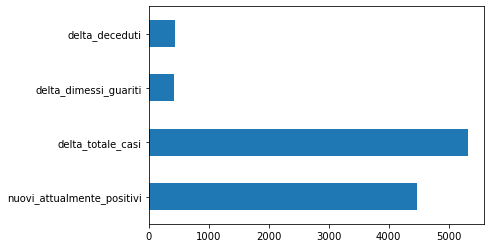

In [499]:
df_naz[['nuovi_attualmente_positivi', 'delta_totale_casi','delta_dimessi_guariti','delta_deceduti']].iloc[-1].plot(kind='barh')

Text(0.5, 1.0, "variazione giornaliera nuovi casi per l'Abruzzo")

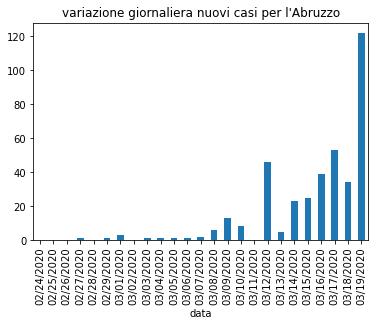

In [500]:
df_reg['Abruzzo']['delta_totale_casi'].plot(kind='bar')
plt.title("variazione giornaliera nuovi casi per l'Abruzzo")

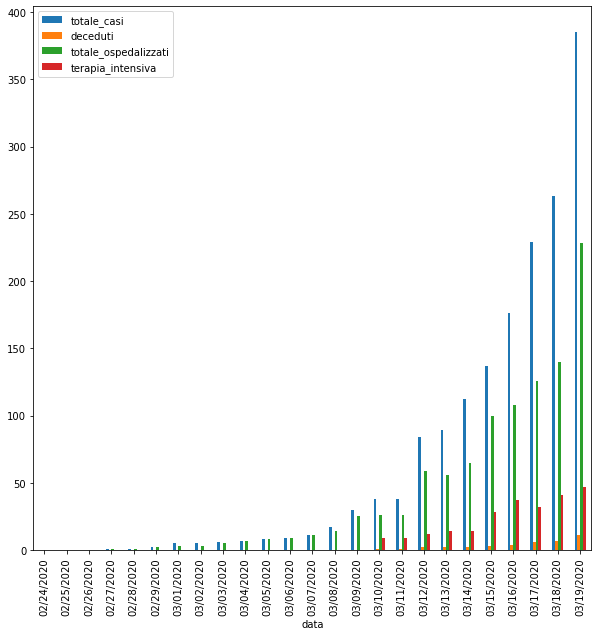

In [525]:
df_reg['Abruzzo'][['totale_casi', 'deceduti', 'totale_ospedalizzati', 'terapia_intensiva']].plot(kind='bar', figsize=(10,10))

### Logistic model evolution

### National Analysis

C:\Users\Maurizio Spadaccino\Documents\projects\coronavirus\notebooks\tools.py:112: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



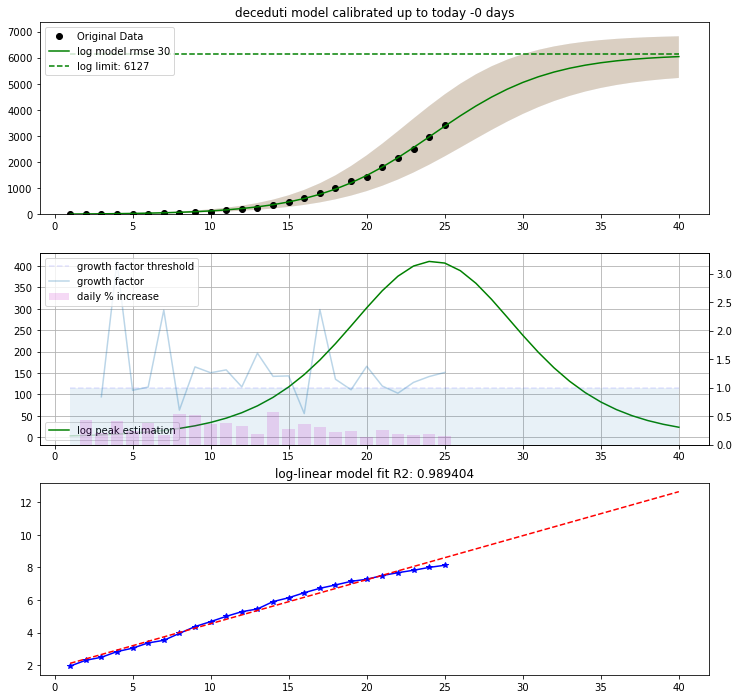

next day prediction for log model:  3777
data
03/15/2020    1809
03/16/2020    2158
03/17/2020    2503
03/18/2020    2978
03/19/2020    3405
Name: deceduti, dtype: int64


In [503]:
tools.plot_model(df_naz, 'deceduti', backward_fit=0, stdev=2, forward_look=15, plotdifferential=True, plotlimit=True, show_pol=False, show_exp=False)

C:\Users\Maurizio Spadaccino\Documents\projects\coronavirus\notebooks\tools.py:112: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



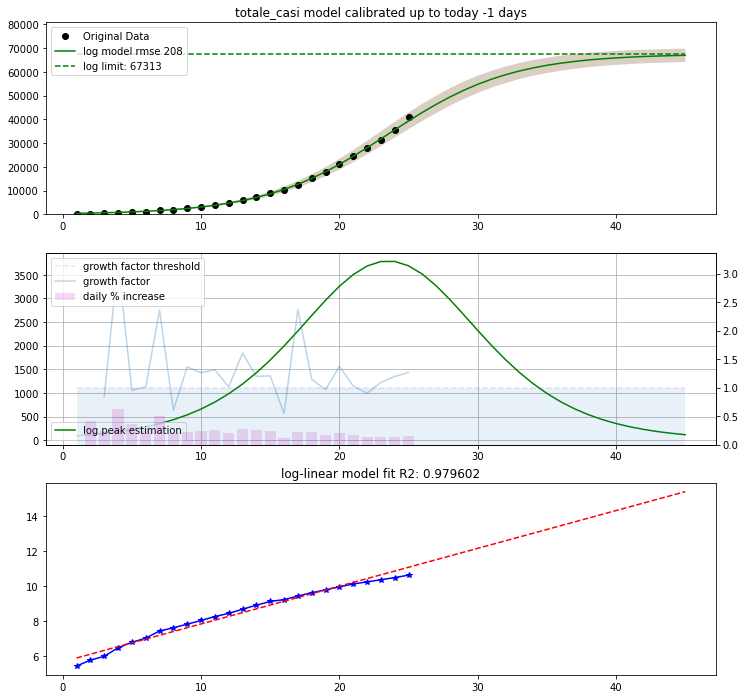

next day prediction for log model:  42919
data
03/15/2020    24747
03/16/2020    27980
03/17/2020    31506
03/18/2020    35713
03/19/2020    41035
Name: totale_casi, dtype: int64


In [505]:
tools.plot_model(df_naz, 'totale_casi', backward_fit=1, forward_look=20, plotlimit=True, show_pol=False, show_exp=False)

### Regional Analysis

C:\Users\Maurizio Spadaccino\Documents\projects\coronavirus\notebooks\tools.py:112: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



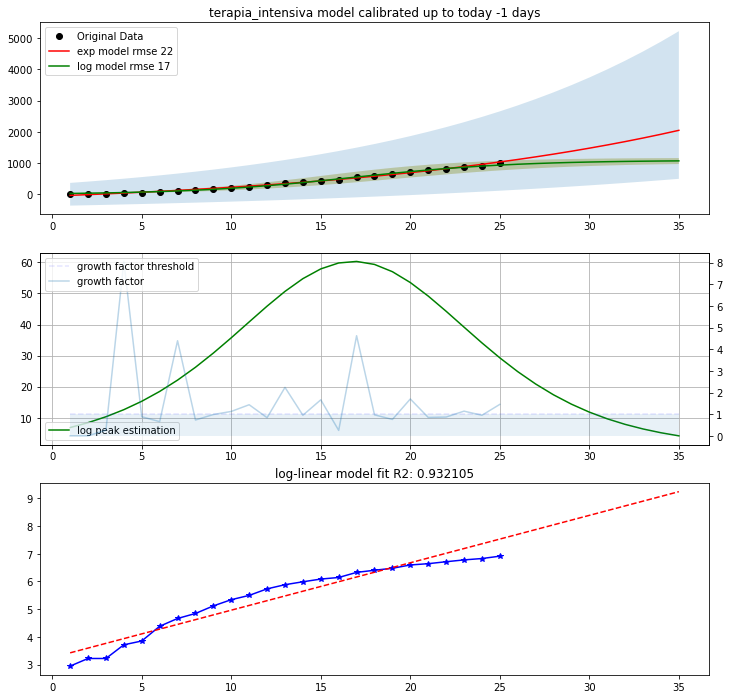

next day prediction for log model:  964
next day prediction for exp model:  1116
data
03/15/2020     767
03/16/2020     823
03/17/2020     879
03/18/2020     924
03/19/2020    1006
Name: terapia_intensiva, dtype: int64


In [519]:
tools.plot_model(df_reg['Lombardia'], 'terapia_intensiva', backward_fit=1, stdev=2, forward_look=10, plotlimit=False, 
                 show_pol=False, show_exp=True)

C:\Users\Maurizio Spadaccino\Documents\projects\coronavirus\notebooks\tools.py:112: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



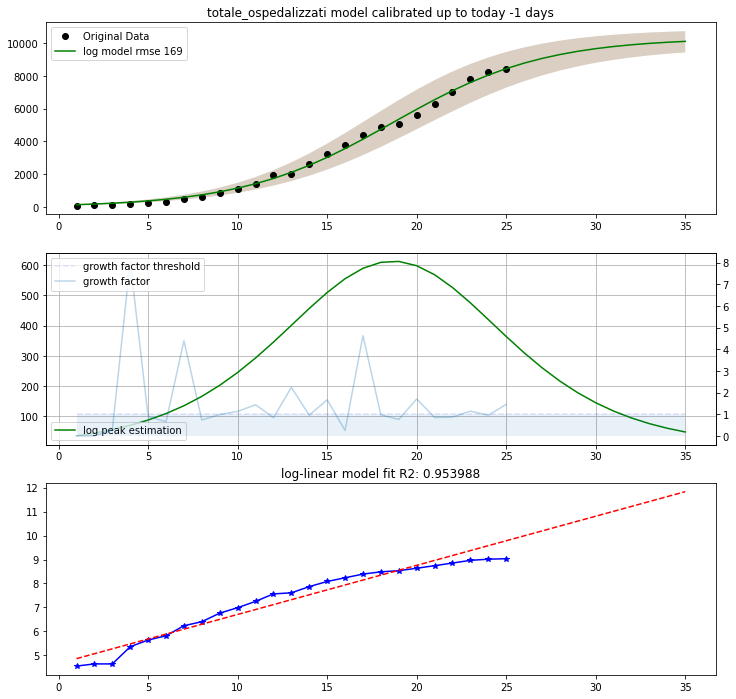

next day prediction for log model:  8772
data
03/15/2020    6267
03/16/2020    6994
03/17/2020    7832
03/18/2020    8209
03/19/2020    8393
Name: totale_ospedalizzati, dtype: int64


In [520]:
tools.plot_model(df_reg['Lombardia'], 'totale_ospedalizzati', backward_fit=1, forward_look=10, plotlimit=False, 
                 show_pol=False, show_exp=False)

C:\Users\Maurizio Spadaccino\Documents\projects\coronavirus\notebooks\tools.py:112: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



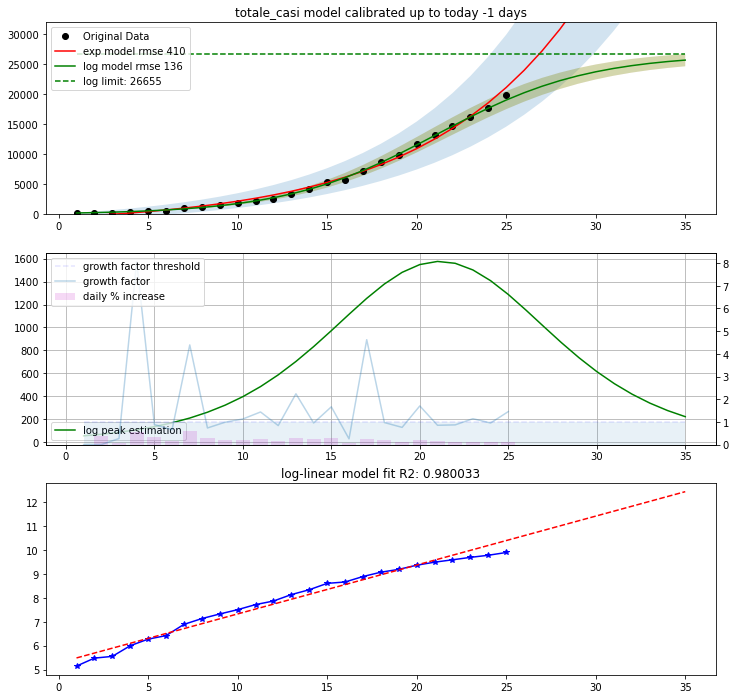

next day prediction for log model:  20273
next day prediction for exp model:  24012
data
03/15/2020    13272
03/16/2020    14649
03/17/2020    16220
03/18/2020    17713
03/19/2020    19884
Name: totale_casi, dtype: int64


In [508]:
tools.plot_model(df_reg['Lombardia'], 'totale_casi', backward_fit=1, forward_look=10, plotlimit=True, 
                 show_pol=False, show_exp=True)

C:\Users\Maurizio Spadaccino\Documents\projects\coronavirus\notebooks\tools.py:112: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



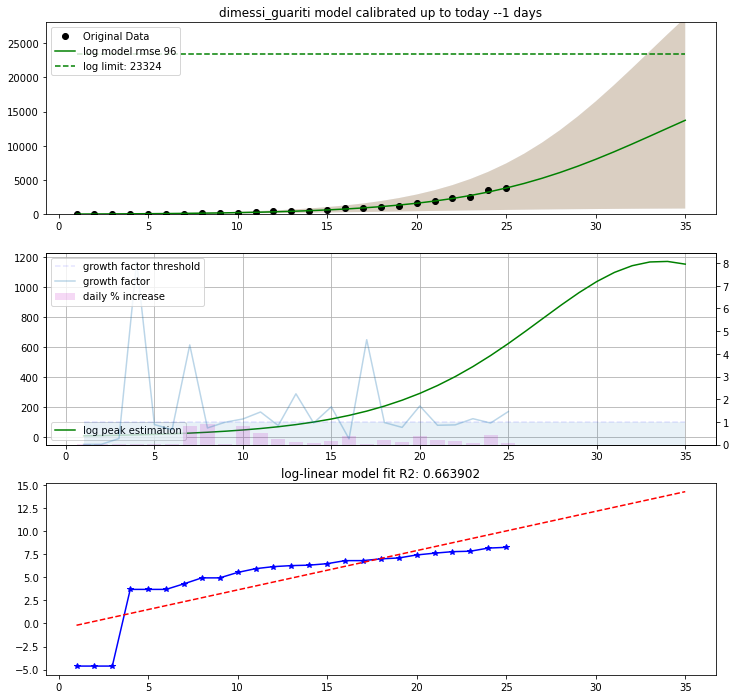

next day prediction for log model:  4506
data
03/15/2020    2011.0
03/16/2020    2368.0
03/17/2020    2485.0
03/18/2020    3488.0
03/19/2020    3778.0
Name: dimessi_guariti, dtype: float64


In [510]:
tools.plot_model(df_reg['Lombardia'].replace(0,0.01), 'dimessi_guariti', backward_fit=-1, forward_look=10, plotlimit=True, 
                 show_pol=False, show_exp=False)

### Lombardy evolution for provinces

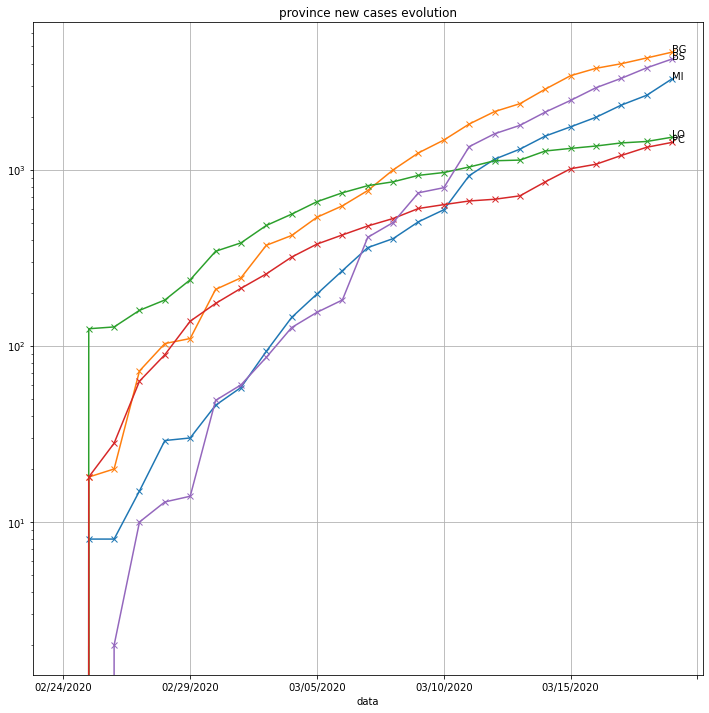

In [511]:
prov_analysis = df_prov.reset_index().pivot_table(index='data', columns='sigla_provincia', 
            values='totale_casi')[['MI', 'BG', 'LO', 'PC', 'BS']]
prov_analysis.plot(kind='line', style='x-', figsize=(12,12), legend=False)
for label in ['MI', 'BG', 'LO', 'PC', 'BS']:
    plt.annotate(label, xy=(len(prov_analysis)-1, prov_analysis[label].iloc[-1]),textcoords='data')
plt.title('province new cases evolution')
plt.grid()
plt.yscale('log')

### china comparison

C:\Users\Maurizio Spadaccino\Documents\projects\coronavirus\notebooks\tools.py:112: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



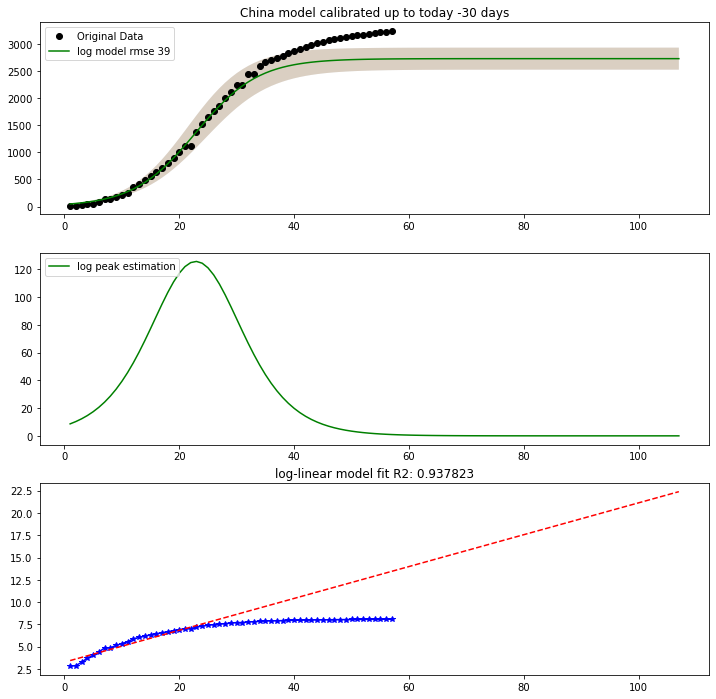

next day prediction for log model:  2729
2020-03-14    3193.0
2020-03-15    3203.0
2020-03-16    3217.0
2020-03-17    3230.0
2020-03-18    3241.0
Name: China, dtype: float64


In [514]:
china_deaths = df_world_deaths[df_world_deaths['Country/Region']=='China'].groupby('Country/Region').sum().drop('Lat',1).drop('Long',1).T.iloc[:-1]
china_deaths.index = pd.to_datetime(china_deaths.index)
tools.plot_model(china_deaths, 'China', backward_fit=30, forward_look=50, plotdifferential=True, plotlimit=False, show_pol=False, show_exp=False)

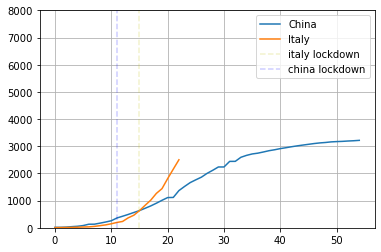

In [125]:
df_compare = pd.DataFrame(data=pd.concat([china_deaths.reset_index(drop=True), df_naz['deceduti'].reset_index(drop=True)], 
                            axis=1))
df_compare.columns = ['China','Italy']
df_compare.plot()
plt.ylim(0,8000)
plt.grid()
plt.axvline(x=15, label='italy lockdown', alpha=0.2, color='y', linestyle='--')
plt.axvline(x=11, label='china lockdown', alpha=0.2, color='b', linestyle='--')
plt.legend()

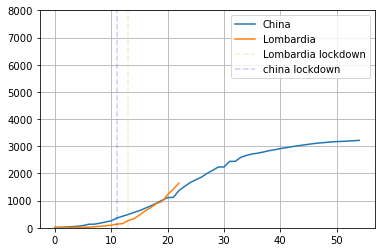

In [126]:
df_compare = pd.DataFrame(data=pd.concat([china_deaths.reset_index(drop=True), 
                    df_reg['Lombardia']['deceduti'].reset_index(drop=True)], axis=1))
df_compare.columns = ['China','Lombardia']
df_compare.plot()
plt.ylim(0,8000)
plt.grid()
plt.axvline(x=13, label='Lombardia lockdown', alpha=0.2, color='y', linestyle='--')
plt.axvline(x=11, label='china lockdown', alpha=0.2, color='b', linestyle='--')
plt.legend()

## World comparisons

In [75]:
countries = ['Spain', 'Italy', 'Germany', 'France', 'United Kingdom', 'US']
df_countries = pd.DataFrame()
df_countries_stripped = pd.DataFrame()
for country in countries:
    print(country)
    df_countries = pd.concat((df_countries, df_world_deaths.groupby('Country/Region').sum().loc[country].drop(['Lat','Long'],0)), 1)
    temp = df_world_deaths.groupby('Country/Region').sum().loc[country].drop(['Lat','Long'],0).reset_index(drop=True)    
    temp = temp.loc[~(temp==0)].reset_index(drop=True).iloc[:-1]    
    df_countries_stripped= pd.concat((df_countries_stripped,  temp), 1)
df_countries.columns = countries
#df_countries_stripped = pd.concat((pd.DataFrame(np.zeros((1,len(countries))), columns=countries), df_countries_stripped),0).reset_index(drop=True)

Spain
Italy
Germany
France
United Kingdom
US


In [151]:
start_dates = {}
start_dates['Spain'] = '3/3/20'
start_dates['Italy'] = '2/21/20'
start_dates['Germany'] = '3/9/20'
start_dates['France'] = '2/25/20'
start_dates['United Kingdom'] = '3/5/20'
start_dates['US'] = '3/1/20'

country_offsets = {}
country_offsets['Spain'] = 0
country_offsets['Italy'] = 0
country_offsets['Germany'] = 0
country_offsets['France'] = -14
country_offsets['United Kingdom'] = 0
country_offsets['US'] = -2

In [152]:
populations.loc['US'] = populations.loc['United States']

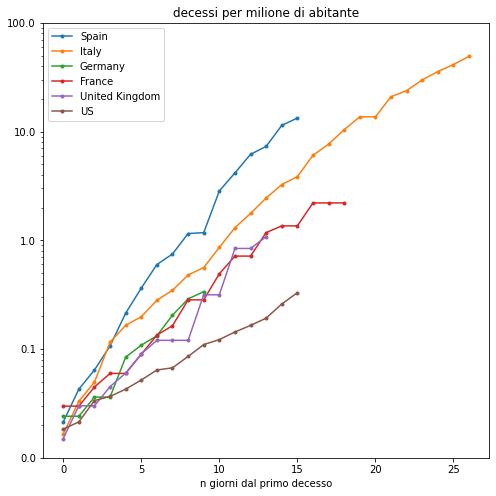

In [153]:

fig, ax = plt.subplots(figsize=(8,8))
for country in countries:
    plt.plot(df_countries_stripped[country].shift(country_offsets[country]) / populations.loc[country] *1e6, '.-', label=country, )
plt.title('decessi per milione di abitante')
plt.xlabel('n giorni dal primo decesso')
plt.yscale('log')
plt.ylim(bottom=0.01, top=100)
from matplotlib.ticker import ScalarFormatter
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.legend()

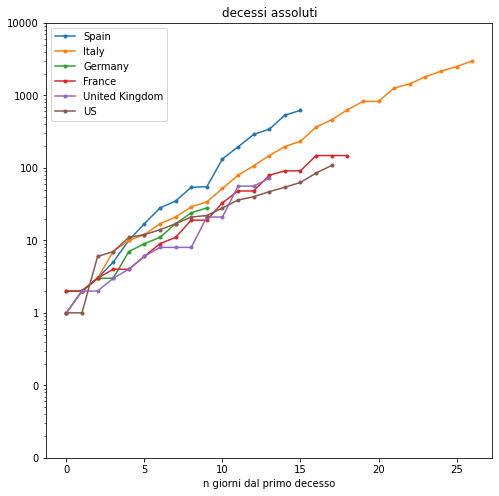

In [146]:
fig, ax = plt.subplots(figsize=(8,8))
for country in countries:
    if country=='France':
        plt.plot(df_countries_stripped[country].shift(-14), '.-', label=country)
    else:
        plt.plot(df_countries_stripped[country], '.-', label=country)
plt.title('decessi assoluti')
plt.xlabel('n giorni dal primo decesso')
plt.yscale('log')
plt.ylim(bottom=0.01, top=10000)
from matplotlib.ticker import ScalarFormatter
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.legend()

## The SIR epidemic model

(see https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/ and 
https://www.r-bloggers.com/epidemiology-how-contagious-is-novel-coronavirus-2019-ncov/)

A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of N individuals into three "compartments" which may vary as a function of time, t:

S(t) are those susceptible but not yet infected with the disease;
I(t) is the number of infectious individuals;
R(t) are those individuals who have recovered from the disease and now have immunity to it.
The SIR model describes the change in the population of each of these compartments in terms of two parameters, β and γ. β describes the effective contact rate of the disease: an infected individual comes into contact with βN other individuals per unit time (of which the fraction that are susceptible to contracting the disease is S/N). γ is the mean recovery rate: that is, 1/γ is the mean period of time during which an infected individual can pass it on.

The differential equations describing this model were first derived by Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)]:

$dSdt=−βSI/N$ <br>
$dIdt=β(SI)/N−γI$ <br>
$dRdt=γI$ <br>

The following Python code integrates these equations for a disease characterised by parameters β=0.2, 1/γ=10days in a population of N=1000 (perhaps 'flu in a school). The model is started with a single infected individual on day 0: I(0)=1. The plotted curves of S(t), I(t) and R(t) are styled to look a bit nicer than Matplotlib's defaults.

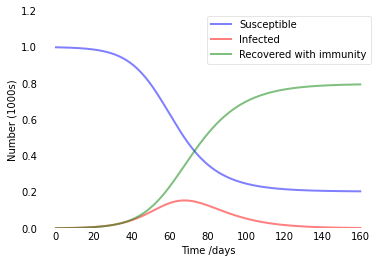

In [172]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [437]:
df_china = pd.DataFrame()
df_china['deaths'] = df_world_deaths.groupby('Country/Region').sum().loc['China'].drop(['Lat','Long'],0)
df_china['recovered'] = df_world_recovered.groupby('Country/Region').sum().loc['China'].drop(['Lat','Long'],0)
df_china['confirmed'] = df_world_confirmed.groupby('Country/Region').sum().loc['China'].drop(['Lat','Long'],0)

In [484]:
from scipy.optimize import curve_fit
#df = df_reg['Lombardia']
df = df_naz # Italy
y_fit = 10*df['totale_attualmente_positivi'].values
x_fit = np.linspace(0, len(y_fit), len(y_fit))
N = populations['Italy'] # total population Italy
#N = 10e6 # total population Lombardia
I0 = 10*df['totale_attualmente_positivi'].iloc[0] # initial number of infected people
R0 = df['dimessi_guariti'].iloc[0] # initial number of recovered
S0 = N - I0 - R0 # Everyone else, S0, is susceptible to infection initially.

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def SIRModel_solver(t, beta, gamma):
    return SIRModel(t, beta, gamma)[1]

def SIRModel(t, beta, gamma):
    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    #ret = solve_diffeq(y0, t, N, beta, gamma)
    S, I, R = ret.T
    return S, I, R

popt_log, pcov_log = curve_fit(f=SIRModel_solver, xdata=x_fit, ydata=y_fit, )
print('beta: ', popt_log[0])
print('gamma: ', popt_log[1])
print('r0: ', popt_log[0]/popt_log[1])
print('mean period of time of infection: ', 1/popt_log[1])

beta:  1.11357476079575
gamma:  0.8979153287367607
r0:  1.2401779156197184
mean period of time of infection:  1.113690754569095


peak period  36


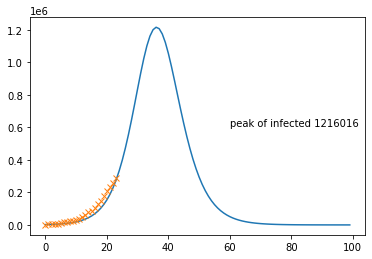

In [486]:
S, I , R = SIRModel(range(100), *popt_log)
plt.plot(I)
#plt.plot(R)
plt.plot(y_fit,'x')
#plt.ylim(0,145000)
plt.text(60, 0.5*max(I),'peak of infected '+str(int(max(I))))
print('peak period ',np.argmax(I))

In [487]:
import scipy.integrate as integrate
mortality_rate = 0.025
total_deaths = mortality_rate * integrate.quad(lambda x: SIRModel_solver((x,), *popt_log), 0, 100)[0]
print('mortality rate ', total_deaths)

mortality rate  5525.000000000002


## simulation using Facebook Phrophet Model

In [127]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\anaconda3\envs\coronavirus\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Traceback (most recent call last):
  File "c:\anaconda3\envs\coronavirus\lib\site-packages\matplotlib\axis.py", line 1573, in convert_units
    ret = self.converter.convert(x, self.units, self)
  File "c:\anaconda3\envs\coronavirus\lib\site-packages\matplotlib\category.py", line 61, in convert
    unit.update(values)
  File "c:\

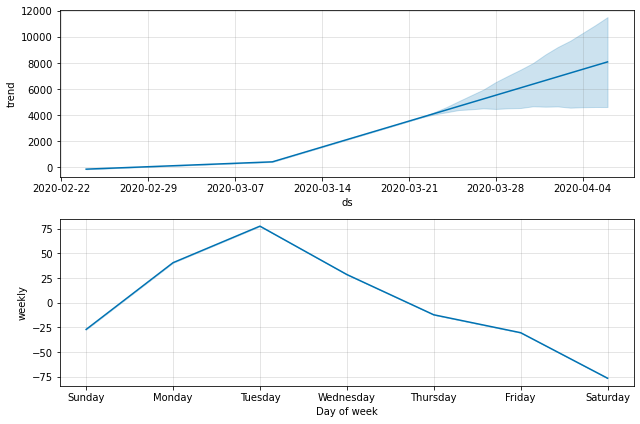

ValueError: view limit minimum -7.930656e+16 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

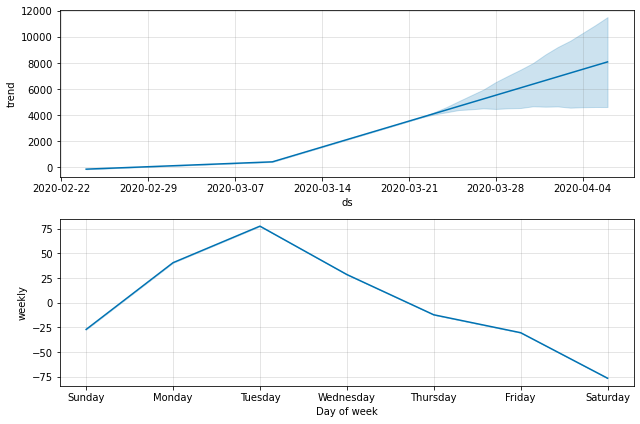

In [128]:

y = 'deceduti'
train_data = pd.DataFrame()
train_data['ds']=df_naz.index
train_data['y']=df_naz[y].reset_index(drop=True).values
growth = 'linear'
cap = 4000
floor = 0
if growth=='logistic':
    train_data['cap'] = cap
    train_data['floor'] = floor

m = Prophet(growth = growth, changepoints=['2020-03-10'], changepoint_prior_scale=0.75)
m.fit(train_data)
future = m.make_future_dataframe(periods=20)
if growth=='logistic':
    future['cap'] = cap
    future['floor'] = floor
forecast = m.predict(future)
fig = m.plot(forecast)

a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.title('prophet forecast for ' + y)
plt.plot(train_data.set_index('ds')['y'],'r*',label='actual data')
#plt.axvspan(whole_data.iloc[0]['ds'], train_data.iloc[-1]['ds'], alpha=0.15, color='red', label='train period')
#plt.axvspan(test_data.iloc[0]['ds'], test_data.iloc[-1]['ds'], alpha=0.15, color='green', label='test period')
plt.legend()
m.plot_components(forecast)
